<a href="https://colab.research.google.com/github/Janahmedtawfik/Janahmedtawfik/blob/main/gold_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib as plt
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
gold = pd.read_csv('gld_price_data.csv')

In [4]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold.shape

(2290, 6)

In [7]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
gold.isna().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [26]:
x = gold.drop(['Date','GLD'],axis=1)
y = gold['GLD']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
model = RandomForestRegressor()

In [29]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [30]:
y_pred2 = model.predict(x_train)

In [31]:
mse = mean_squared_error(y_train, y_pred2)
print(mse)

0.7494965537429501


In [32]:
r2 = r2_score(y_train, y_pred2)
print(r2) #new accuracy score

0.9986123782147196


In [33]:
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(r2) #old one

0.9902209096332357


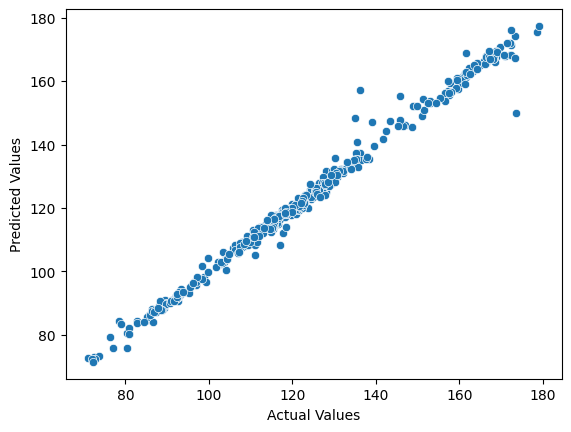

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=y_test, y=y_pred) #we use y_test 3shan dal actual values whilst x_test dal input
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [39]:
input_data = [1447.160034,84.860001,78.470001,15.18]  # Replace with your actual input values
input_data_numpy = np.asarray(input_data)
input_data_reshaped = input_data_numpy.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print("gold price prediction:", prediction)

gold price prediction: [151.46650283]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
